In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator
import streamlit as st
import mlflow
import dvc.api
from google.cloud import storage

import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

from ultralytics import YOLO
from PIL import Image

In [8]:
global storage_client
global bucket_name
storage_client = storage.Client()
bucket_name = "mlops-car-detection"

def list_blobs(bucket_name):
    # Note: Client.list_blobs requires at least package version 1.17.0.
    blobs = storage_client.list_blobs(bucket_name)
    
    # for blob in blobs:
    #     print(blob.name)
        
    blob_names = [blob.name for blob in blobs if blob.name.endswith('.jpg')]
    return blob_names
    # blob_list_names = [blob.name for blob in blobs if blob.name.endswith(".jpg")]

In [12]:
def display_random_image(bucket_name):
    blob_names = list_blobs(bucket_name)
    if not blob_names:
        print("No .jpg files found in the bucket.")
        return
    
    # Randomly select a blob name
    selected_blob_name = random.choice(blob_names)
    # print("Selected Blob:", selected_blob_name)

    # Download the selected blob
    blob = storage_client.bucket(bucket_name).get_blob(selected_blob_name)
    if blob is None:
        print("Failed to retrieve blob.")
        return

    # Download the blob's content
    blob_content = blob.download_as_bytes()

    # Decode the image content
    nparr = np.frombuffer(blob_content, np.uint8)
    image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    
    # Display the image
    # cv2.imshow("Random Image", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    return image

# Call the function to display a random image from the specified bucket
display_random_image(bucket_name)

array([[[188, 187, 183],
        [188, 187, 183],
        [188, 187, 183],
        ...,
        [182, 181, 177],
        [182, 181, 177],
        [182, 181, 177]],

       [[188, 187, 183],
        [188, 187, 183],
        [188, 187, 183],
        ...,
        [182, 181, 177],
        [182, 181, 177],
        [182, 181, 177]],

       [[188, 187, 183],
        [188, 187, 183],
        [188, 187, 183],
        ...,
        [182, 181, 177],
        [182, 181, 177],
        [182, 181, 177]],

       ...,

       [[122, 130, 130],
        [121, 129, 129],
        [121, 129, 129],
        ...,
        [111, 116, 119],
        [112, 117, 120],
        [113, 118, 121]],

       [[117, 125, 124],
        [116, 124, 123],
        [116, 124, 123],
        ...,
        [111, 116, 119],
        [111, 116, 119],
        [113, 118, 121]],

       [[118, 126, 125],
        [117, 125, 124],
        [116, 124, 123],
        ...,
        [110, 115, 118],
        [111, 116, 119],
        [112, 117, 120]]

In [9]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 6.67MB/s]



0: 224x224 (no detections), 65.0ms
Speed: 2.0ms preprocess, 65.0ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


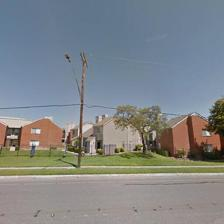

In [21]:
image = display_random_image(bucket_name)
result_predict = model.predict(source = image, imgsz=(224))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [22]:
import mlflow

epochs = 10
batch_size = 8
learning_rate = 0.001


In [ ]:

# Start MLflow run
mlflow.start_run()

# Log parameters
mlflow.log_param('epochs', epochs)
mlflow.log_param('batch_size', batch_size)
mlflow.log_param('learning_rate', learning_rate)
...

# Start training loop
# for epoch in range(epochs):
#     # Training code here
#     ...
#     # Log metrics to MLflow
#     mlflow.log_metric('loss', train_loss, step=epoch)
#     mlflow.log_metric('accuracy', train_accuracy, step=epoch)
    
#     # Validation code here
#     ...
#     # Log validation metrics to MLflow
#     mlflow.log_metric('val_loss', val_loss, step=epoch)
#     mlflow.log_metric('val_accuracy', val_accuracy, step=epoch)

# # Save the trained model
# torch.save(model.state_dict(), 'yolov5_custom.pt')

# # Log the model as an artifact in MLflow
# mlflow.log_artifact('yolov5_custom.pt')

# # End MLflow run
# mlflow.end_run()
